In [1]:
%cd '/content/sample_data/'

/content/sample_data


In [2]:
!wget -q https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.names  
!wget -q https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data
!unzip -q abalone.names
!unzip -q abalone.names

[abalone.names]
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of abalone.names or
        abalone.names.zip, and cannot find abalone.names.ZIP, period.
[abalone.names]
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of abalone.names or
        abalone.names.zip, and cannot find abalone.names.ZIP, period.


In [7]:
import pandas as pd
df = pd.read_csv('abalone.data', header=None)
df

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [9]:
df.columns = ['Sex', 'Length', 'Diameter', 'Height', 	'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [12]:
df.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [13]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [14]:
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)
df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,1,0


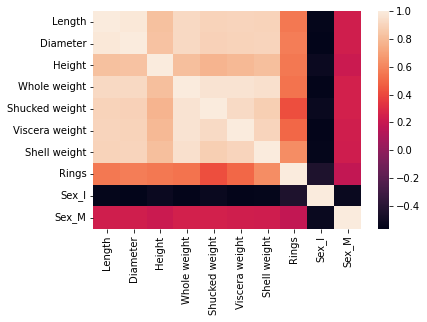

In [15]:
import seaborn as sns
sns.heatmap(df.corr())

In [17]:
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [18]:
X = df.drop('Rings', axis=1)
y = df['Rings']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [19]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3132, 9), (1045, 9), (3132,), (1045,))

In [20]:
regr = LinearRegression()
  
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.5189807672114986


In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [38]:
mean_absolute_error(y_test, regr.predict(X_test)), mean_squared_error(y_test, regr.predict(X_test)), np.sqrt(mean_squared_error(y_test, regr.predict(X_test)))

(1.60802569351493, 4.91494640390418, 2.216967840069896)

In [39]:
from sklearn.neighbors import KNeighborsRegressor

In [40]:
neigh = KNeighborsRegressor(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [41]:
mean_absolute_error(y_test, neigh.predict(X_test)), mean_squared_error(y_test, neigh.predict(X_test)), np.sqrt(mean_squared_error(y_test, neigh.predict(X_test)))

(1.6819776714513555, 5.606060606060606, 2.367712103711219)